# Machine Learning Engineer Nanodegree
## Capstone Project - Notebook/Workbook

Eoin Kelly
June 9th, 2019

### I. Definition

#### Project Overview
In this section, look to provide a high-level overview of the project in layman’s terms. Questions to ask yourself when writing this section:

Has an overview of the project been provided, such as the problem domain, project origin, and related datasets or input data?
Has enough background information been given so that an uninformed reader would understand the problem domain and following problem statement?

#### Problem Statement
The problem with back pain is that it can be difficult to diagnose exactly what the root cause of the problem is. If we are able to analyse a number of symptoms that our patients show, we can try to cluster them into groups and certain groupings we hope to show are part of different types of lower back pain. This would help doctors to diagnose the best treatments for their patients. We have the response variable for each of these patients so we will be able to measure how well our models have performed using some format of training, validation and testing models so as not to bias our research.

Once we have these clusters of symptoms, we will be using the classification method of learning to attempt to diagnose which type of LBP the patient is showing. The symptoms/inputs that we will be analysing are different symptoms resulting from back pain. We will be putting the binary yes/no answer to symptoms through our classifier algorithm and this will give us an output which is the type of LBP exhibited by our patient. We will then compare our classifications against the real symptoms which are also recorded in the dataset. This is therefore a supervised learning multi-class classification problem.


### II. DataSet Exploration

The dataset to be considered for this project was available on my past university's website and it had been touched on during one of our lectures which is where I got the idea to use this as my final project for this course. There is no sensitive data within our dataset.

The dataset itself contains data acquired by doctors/physiotherapists examining patients with lower back pain.  
There are 464 subjects in this study. It contains the group of back pain the patient belongs to, which is our response variable and can be any of the categorical responses “nociceptive,” “peripheral neuropathic,” or “central sensitization”. Each of these are a type of disorder related to patients with Lower Back Pain. It is important to be able to diagnose these correctly as each type has very different treatment steps.

#### Initial Exploration


In [358]:
#importing modules necessary
import pandas as pd
import numpy as np  
from urllib.request import urlopen
import itertools
import matplotlib.pyplot as plt

print('Done')

Done


In [286]:
url ='http://mathsci.ucd.ie/~brendan/data/Physio.txt'
data = pd.read_csv(url, sep='\s+')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X28,X29,X30,X31,X32,X33,X34,X35,X36,assigned.labels
1,0,1.0,0,0.0,1.0,0,0,1,0,0,...,0,0,1,0.0,0,0,0,0.0,0,Nociceptive
2,0,1.0,0,0.0,1.0,0,0,1,0,0,...,0,0,0,0.0,0,0,0,0.0,0,Nociceptive
3,0,1.0,0,0.0,1.0,0,0,1,0,0,...,0,0,1,0.0,0,1,1,0.0,0,Nociceptive
4,0,1.0,1,0.0,0.0,0,1,0,1,0,...,0,0,0,0.0,0,0,0,0.0,0,Peripheral Neuropathic
5,1,1.0,0,0.0,1.0,0,0,1,0,0,...,0,0,0,0.0,0,0,0,0.0,0,Nociceptive


In [287]:
print(len(data))
print("Dataset is of shape {} x {}".format(data.shape[0], data.shape[1]))
print("Are there null values in the dataset? - {}".format(data.isnull().any().any()))
print("How many nulls are there? - {}".format(data.isnull().sum().sum()))


# Where do these null values occur?
print('\n\nThese nulls occur in the below fields')
data.isnull().sum()

464
Dataset is of shape 464 x 37
Are there null values in the dataset? - True
How many nulls are there? - 44


These nulls occur in the below fields


X1                  0
X2                  1
X3                  0
X4                  2
X5                  1
X6                  0
X7                  0
X8                  0
X9                  0
X10                 0
X11                 0
X12                 0
X13                 0
X14                 2
X15                 0
X16                 0
X17                 0
X18                 2
X19                29
X20                 2
X21                 1
X22                 0
X23                 0
X24                 0
X25                 1
X26                 0
X27                 1
X28                 0
X29                 0
X30                 0
X31                 1
X32                 0
X33                 0
X34                 0
X35                 1
X36                 0
assigned.labels     0
dtype: int64

In [288]:
data = data.fillna(0)

In [298]:
# Response variables vs. Explanatory variables

data = data.fillna(0)
Y = data['assigned.labels'].astype('category')
X = data.drop(['assigned.labels'],axis = 1)
print('Nociceptive  patients = {}'.format(sum(Y=='Nociceptive')))
print('Peripheral Neuropathic patients = {}'.format(sum(Y=='Peripheral Neuropathic')))
print('Central Neuropathic patients = {}'.format(sum(Y=='Central Neuropathic')))

Nociceptive  patients = 256
Peripheral Neuropathic patients = 102
Central Neuropathic patients = 106


This shows that our dataset is unbalanced

### Further Exploration + Visualisations

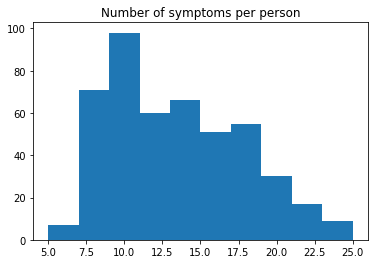

In [299]:
symptoms_per_person=(data==1).astype(int).sum(axis=1)
plt.hist(symptoms_per_person)
plt.title("Number of symptoms per person")
plt.show()

### III. Clustering

#### K-Means

ARI for 1 groups = 0.0
ARI for 2 groups = 0.4597765735531884
ARI for 3 groups = 0.7775006133940894
ARI for 4 groups = 0.537676496449263
ARI for 5 groups = 0.49126257623256886
ARI for 6 groups = 0.44310633540327343
ARI for 7 groups = 0.38928487557584635
ARI for 8 groups = 0.39902172635513694
ARI for 9 groups = 0.3507593153677875


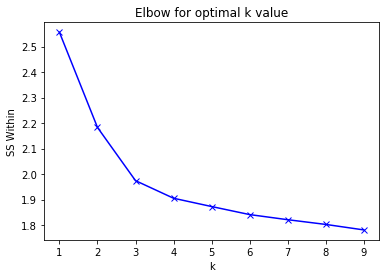

In [443]:
# k-means to find K
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import adjusted_rand_score
from scipy.spatial.distance import cdist


SS = []
K = range(1,10)

# Run algo for values of k, comparing the SS within each time
for k in K:
    kmean1 = KMeans(n_clusters=k).fit(X)
    kmean1.fit(X)
    y_kmeans_pred = kmean1.predict(X)
    print('ARI for {} groups = {}'.format(k, adjusted_rand_score(Y, y_kmeans_pred)))
    SS.append(sum(np.min(cdist(X, kmean1.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

# Plot the elbow
plt.plot(K, groups, 'bx-')
plt.xlabel('k')
plt.ylabel('SS Within')
plt.title('Elbow for optimal k value')
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.32310504930916906
For n_clusters = 3 The average silhouette_score is : 0.2532512350870012
For n_clusters = 4 The average silhouette_score is : 0.1482748298515827


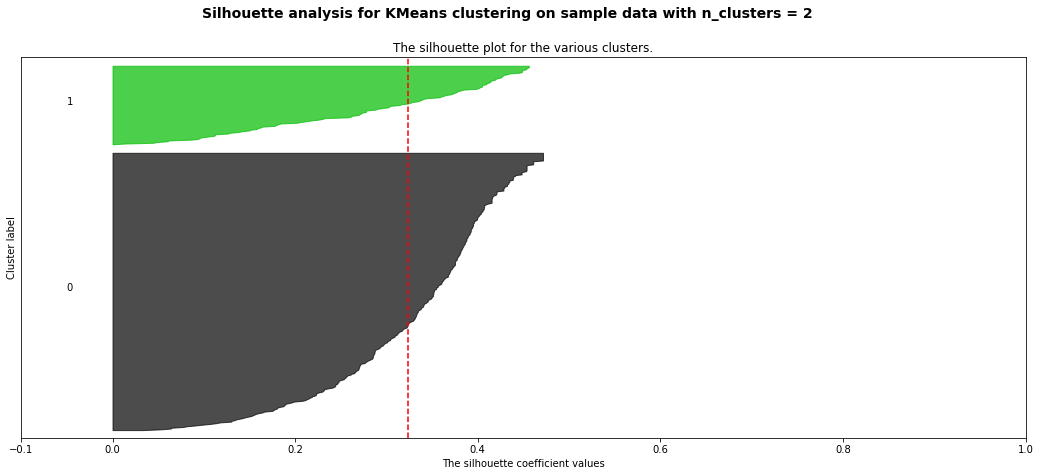

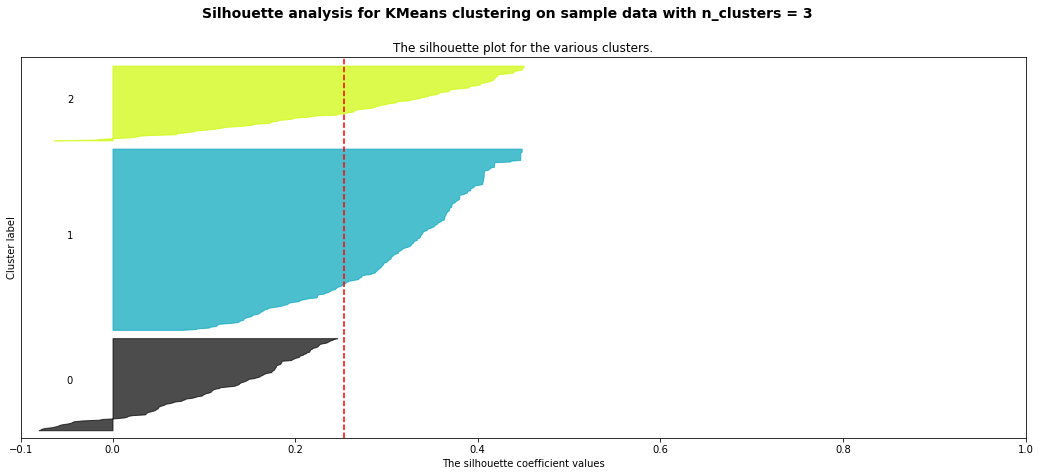

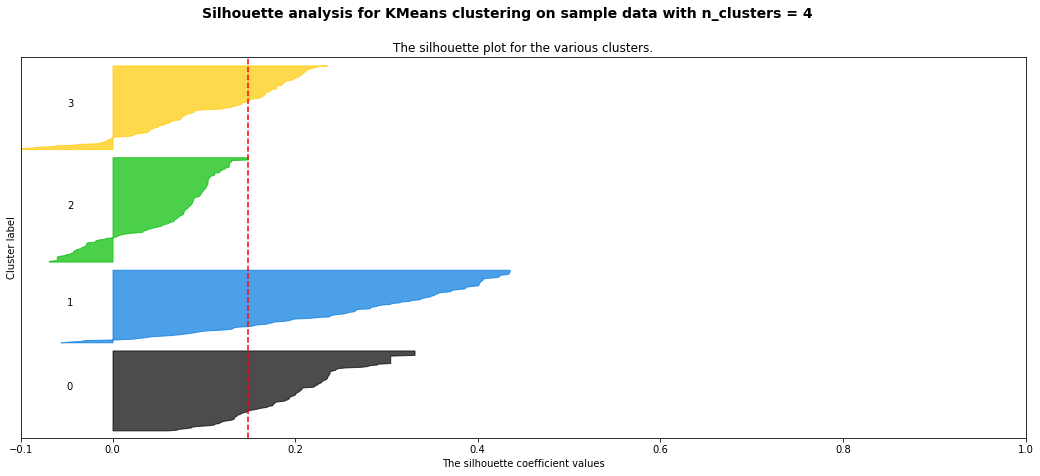

In [445]:
# Use silhouettes to see how well the data looks for values K = 2,3,4. 
# These are the values around the elbow in the above graph
# From https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

import matplotlib.cm as cm

k_values = [2,3,4]


for n_clusters in k_values:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


### IV. Classification

#### 1. Training + Testing Data



In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

print("Training set has {} observations".format(X_train.shape[0]))
print("Test set has {} observations".format(X_test.shape[0]))

Training set has 348 observations
Test set has 116 observations


#### 2. Benchmark

In [444]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model


In [454]:
Kneighbor = KNeighborsClassifier(n_neighbors=4)
Kneighbor.fit(X_train, y_train) 
y_pred = Kneighbor.predict(X_test)
knacc= accuracy_score(y_test, y_pred)

print("Accuracy of the classifier: {}".format(knacc))

Accuracy of the classifier: 0.8706896551724138


#### 3. Decision Tree


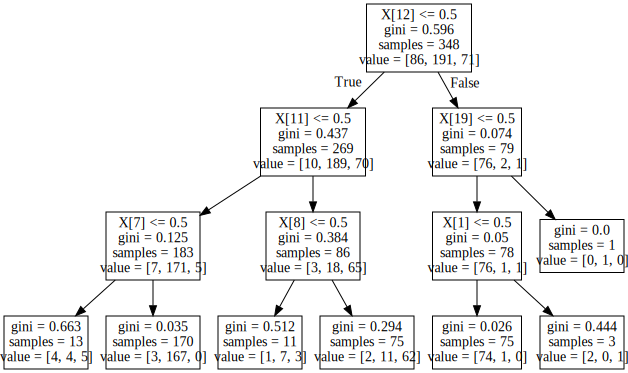

In [436]:
decisiontreeclass = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)

dot_data = export_graphviz(decisiontreeclass, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [456]:
y_pred_prob = decisiontreeclass.predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(label=title)
    tick_marks = np.arange(len(classes))
    ax.xaxis.set_ticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.yaxis.set_ticks(tick_marks)
    ax.set_yticklabels(classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    fig.tight_layout()
    plt.show()

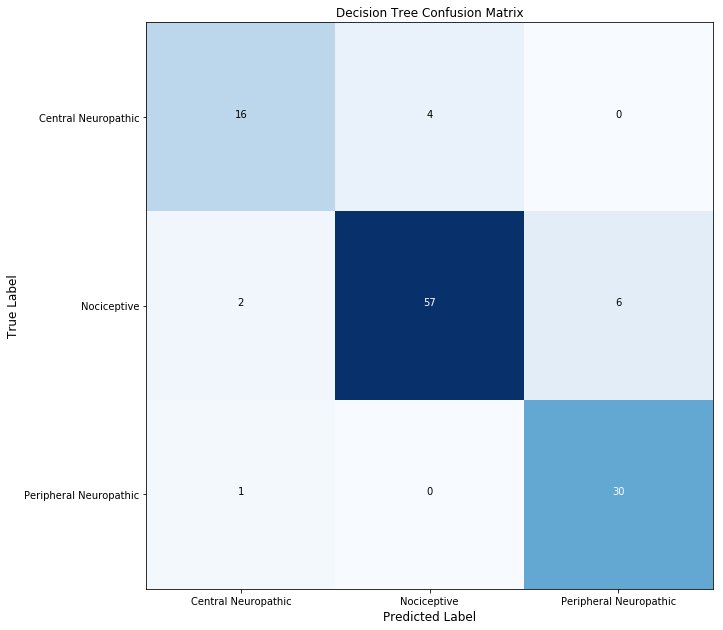

                        precision    recall  f1-score   support

   Central Neuropathic       0.84      0.80      0.82        20
           Nociceptive       0.93      0.88      0.90        65
Peripheral Neuropathic       0.83      0.97      0.90        31

           avg / total       0.89      0.89      0.89       116



In [458]:
cnf_matrix = confusion_matrix(y_test, y_pred_prob)

plot_confusion_matrix(cnf_matrix, classes=["Central Neuropathic","Nociceptive", "Peripheral Neuropathic"], normalize=False,
                      title='Decision Tree Confusion Matrix')


plt.show()
print(classification_report(y_test, y_pred_prob))

#### 4. Random Forest


In [481]:
def randomForestCV(classifier, name, kwargs, n_est):   # difficulty getting GridSearchCV working

    # RandomForest - get the accuracy and log loss of each classifier with parameters
    classifier_list=[]
    rf = classifier(n_estimators=n_est, **kwargs,max_depth =4)
    rf.fit(X_train, y_train) 
    
    y_train_pred = rf.predict(X_train)
    train_rfacc= accuracy_score(y_train, y_train_pred)
  
    
    y_test_pred = rf.predict(X_test)
    test_rfacc= accuracy_score(y_test, y_test_pred)
    print("{} ({} trees)".format(name, n_est))

    print("Training Set Statistics - Accuracy : {:.3f}".format( train_rfacc))
    print("Testing Set Statistics  - Accuracy : {:.3f}".format( test_rfacc))
    print("\n")
    return(classifier_list)

n_trees_list=[2,3,4,6,8,10,25,100,500]

[randomForestCV(RandomForestClassifier, "Random Forest Classifier", {'class_weight':'balanced'}, n_est=i) for i in n_trees_list];

Random Forest Classifier (2 trees)
Training Set Statistics - Accuracy : 0.914
Testing Set Statistics  - Accuracy : 0.905


Random Forest Classifier (3 trees)
Training Set Statistics - Accuracy : 0.908
Testing Set Statistics  - Accuracy : 0.871


Random Forest Classifier (4 trees)
Training Set Statistics - Accuracy : 0.940
Testing Set Statistics  - Accuracy : 0.879


Random Forest Classifier (6 trees)
Training Set Statistics - Accuracy : 0.934
Testing Set Statistics  - Accuracy : 0.897


Random Forest Classifier (8 trees)
Training Set Statistics - Accuracy : 0.948
Testing Set Statistics  - Accuracy : 0.914


Random Forest Classifier (10 trees)
Training Set Statistics - Accuracy : 0.948
Testing Set Statistics  - Accuracy : 0.905


Random Forest Classifier (25 trees)
Training Set Statistics - Accuracy : 0.948
Testing Set Statistics  - Accuracy : 0.914


Random Forest Classifier (100 trees)
Training Set Statistics - Accuracy : 0.951
Testing Set Statistics  - Accuracy : 0.914


Random Fores

In [485]:
# 8 trees seems to give the best results -> less overfitting than the higher numbers

rf = RandomForestClassifier(n_estimators=8, **{'class_weight':'balanced','max_depth':4})
rf.fit(X_train, y_train) 

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

train_rf_acc= accuracy_score(y_train, y_train_pred)
test_rf_acc= accuracy_score(y_test, y_test_pred)
print("Training accuracy : {}".format(train_rf_acc))
print("Testing accuracy: {}".format(test_rf_acc))


Training accuracy : 0.9482758620689655
Testing accuracy: 0.9224137931034483


As this is an ensemble of tree, we cannot visualise this within graphviz

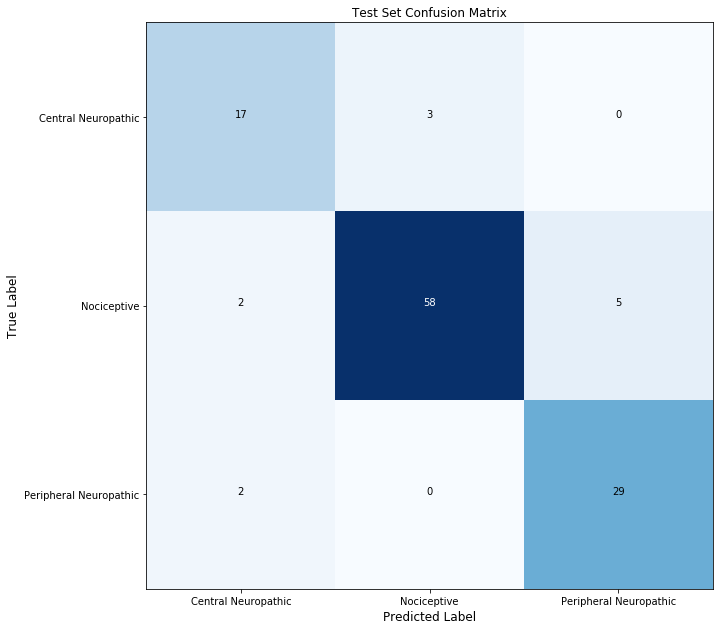

                        precision    recall  f1-score   support

   Central Neuropathic       0.81      0.85      0.83        20
           Nociceptive       0.95      0.89      0.92        65
Peripheral Neuropathic       0.85      0.94      0.89        31

           avg / total       0.90      0.90      0.90       116



In [484]:
cnf_matrix = confusion_matrix(y_test, y_test_pred)

plot_confusion_matrix(cnf_matrix, classes=["Central Neuropathic","Nociceptive", "Peripheral Neuropathic"], normalize=False,
                      title='Test Set Confusion Matrix')


plt.show()
#calculating sensitivity and specificity
print(classification_report(y_test, y_test_pred))

#### 5. Adaboost


In [472]:
# After sampling many parameters this turns out to fit our data best
ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=1), n_estimators=5)
ada.fit(X_train, y_train)
ada.predict(X_test)

y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

train_rfacc= accuracy_score(y_train, y_train_pred)
test_rfacc= accuracy_score(y_test, y_test_pred)
print("Training accuracy : {}".format(train_rfacc))
print("Testing accuracy: {}".format(test_rfacc))

Training accuracy : 0.9281609195402298
Testing accuracy: 0.9137931034482759


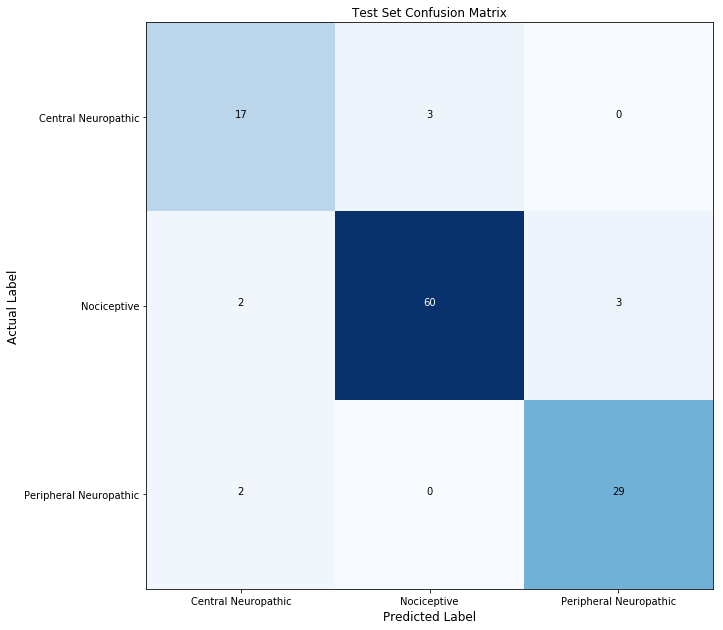

                        precision    recall  f1-score   support

   Central Neuropathic       0.81      0.85      0.83        20
           Nociceptive       0.95      0.92      0.94        65
Peripheral Neuropathic       0.91      0.94      0.92        31

           avg / total       0.92      0.91      0.91       116



In [314]:
cnf_matrix = confusion_matrix(y_test, y_test_pred)

plot_confusion_matrix(cnf_matrix, classes=["Central Neuropathic","Nociceptive", "Peripheral Neuropathic"], normalize=False,
                      title='Test Set Confusion Matrix')


plt.show()
#calculating sensitivity and specificity
print(classification_report(y_test, y_test_pred))

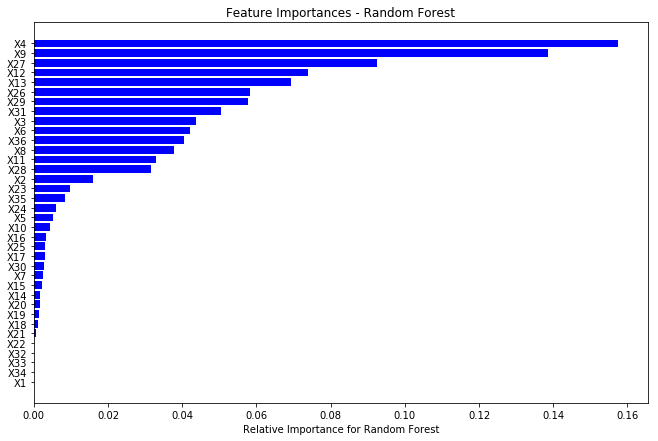

In [315]:
features = data.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(11,7))
plt.title('Feature Importances - Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance for Random Forest')
plt.show()

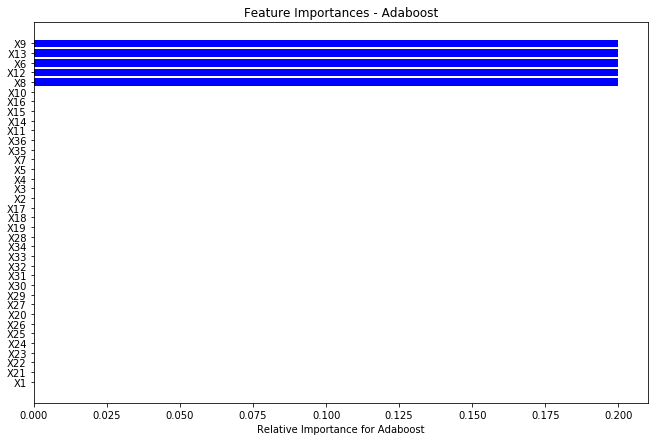

In [316]:
features_ada = data.columns
importances_ada = ada.feature_importances_
indices_ada = np.argsort(importances_ada)

plt.figure(figsize=(11,7))
plt.title('Feature Importances - Adaboost')
plt.barh(range(len(indices_ada)), importances_ada[indices_ada], color='b', align='center')
plt.yticks(range(len(indices_ada)), [features_ada[i] for i in indices_ada])
plt.xlabel('Relative Importance for Adaboost')
plt.show()

##### Logistic Regression - Multinomial Model

In [327]:
multinom = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train,y_train)

In [447]:
multinom_pred_train = multinom.predict(X_train)
multinom_pred_test = multinom.predict(X_test)

print('Train Score = {}'.format(accuracy_score(y_train, multinom_pred_train)))
print('Test Score = {}'.format(accuracy_score(y_test, multinom_pred_test)))

Train Score = 0.9798850574712644
Test Score = 0.9224137931034483


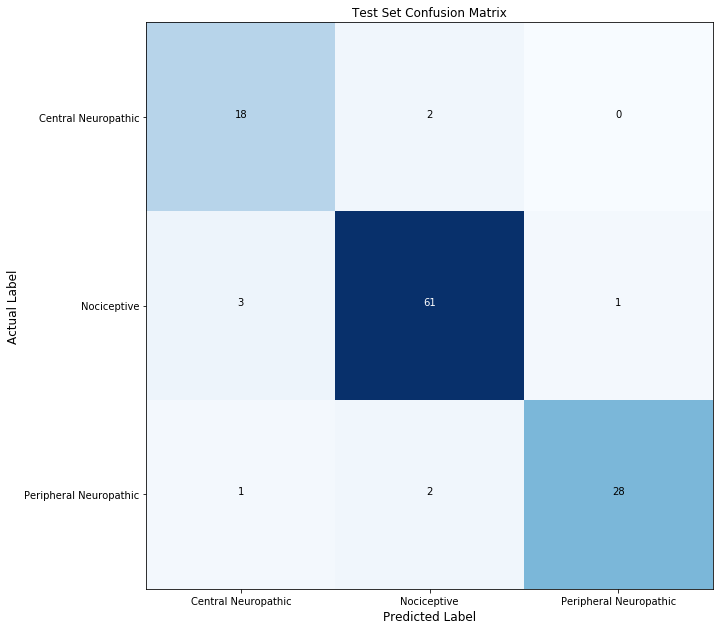

In [439]:
cnf_matrix = confusion_matrix(y_test, multinom_pred_test)

plot_confusion_matrix(cnf_matrix, classes=["Central Neuropathic","Nociceptive", "Peripheral Neuropathic"], normalize=False,
                      title='Test Set Confusion Matrix')


plt.show()


In [329]:
print(classification_report(y_test, multinom.predict(X_test)))

                        precision    recall  f1-score   support

   Central Neuropathic       0.82      0.90      0.86        20
           Nociceptive       0.94      0.94      0.94        65
Peripheral Neuropathic       0.97      0.90      0.93        31

           avg / total       0.92      0.92      0.92       116



### V. Conclusion
Amongst the classifiers, adaboost seems to be the simplest algorithm however the random forest produces the best results amongst the classifiers with its aggregated take on things it removes overfitting.

However the multi-class logistic regression model that I had initially suggested to be used as my benchmark model is the best overall predictor of pain groups. I have moved it down to the bottom of this project now with the hope that I can use the cluster groupings as my benchmark model in predicting which groups each patient belongs too.